## Anomaly Detection

In [49]:
import cv2
import numpy as np

# Initialize video capture
cap = cv2.VideoCapture(0)  # 0 for default camera, replace with video source if needed

# Initialize background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    fgmask = fgbg.apply(frame)
    
    _, thresh = cv2.threshold(fgmask, 250, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((5,5), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    height, width, _ = frame.shape
    top_left = (width//4, height//4)
    bottom_right = (3*width//4, 3*height//4)
    cv2.rectangle(frame, top_left, bottom_right, (0, 0, 255), 2)  
    
    for contour in contours:
        if cv2.contourArea(contour) < 500:  
            continue
        
        x, y, w, h = cv2.boundingRect(contour)
        
        if (x > top_left[0] and x+w < bottom_right[0]) and (y > top_left[1] and y+h < bottom_right[1]):
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)  # Draw bounding box around the detected object in red
            cv2.putText(frame, "ALARM!", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    cv2.imshow('Security Feed', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


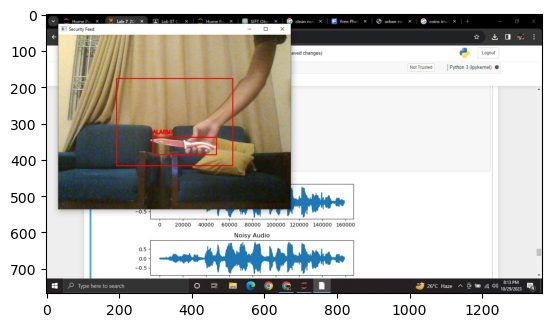

In [53]:
plt.imshow(cv2.imread("security_output.jpg")[:,:,::-1])